# Simple CNN
## 圖像的深度學習演算法: 卷積神經網路 (Convolutional Neural Network)

In [1]:
from keras.datasets import cifar10
# MAC 一定要加入此行, 才不會把對方伺服器的 SSL 證書視為無效
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt
%matplotlib inline
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
label = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",
         5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

請輸入你想可視化的圖片 [0-49999]:10000
你想可視化的圖片號碼是 10000
圖片答案是 車


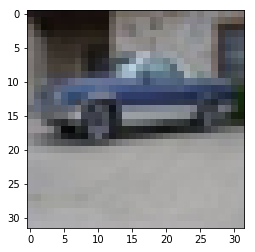

In [4]:
a = int(input("請輸入你想可視化的圖片 [0-49999]:"))
print("你想可視化的圖片號碼是", a)
print("圖片答案是", label[y_train[a][0]])
plt.imshow(x_train[a])

In [5]:
from keras.utils import np_utils
x_train_shaped = x_train.astype("float32") / 255
x_test_shaped = x_test.astype("float32") / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
# 第一次卷積和第一次池化
model.add(Conv2D(filters=32,
kernel_size=(3, 3),
input_shape=(32, 32, 3),
activation='relu',
padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 斷開 25% 的連接
# 並且加入第二次卷積和第二次池化
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 把你處理過的東西攤開成為一維
model.add(Flatten())
model.add(Dropout(rate=0.25))
# 全連接層
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

W0823 20:56:10.878671  4172 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 20:56:10.894628  4172 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 20:56:10.896622  4172 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 20:56:10.906594  4172 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is d

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)             

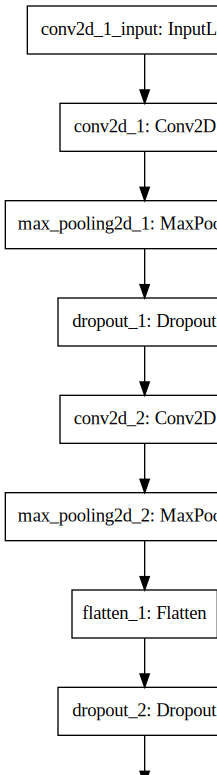

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
                          validation_split = 0.1,
                          epochs = 10,
                          batch_size = 128,
                          verbose = 2)

W0823 21:03:16.761051  4172 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 21:03:16.778023  4172 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0823 21:03:16.842856  4172 deprecation.py:323] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 9s - loss: 1.7652 - acc: 0.3545 - val_loss: 1.4734 - val_acc: 0.4770
Epoch 2/10
 - 7s - loss: 1.4090 - acc: 0.4921 - val_loss: 1.2431 - val_acc: 0.5642
Epoch 3/10
 - 7s - loss: 1.2621 - acc: 0.5467 - val_loss: 1.1010 - val_acc: 0.6316
Epoch 4/10
 - 7s - loss: 1.1714 - acc: 0.5829 - val_loss: 1.0204 - val_acc: 0.6518
Epoch 5/10
 - 7s - loss: 1.1076 - acc: 0.6059 - val_loss: 0.9755 - val_acc: 0.6608
Epoch 6/10
 - 7s - loss: 1.0587 - acc: 0.6260 - val_loss: 0.9720 - val_acc: 0.6624
Epoch 7/10
 - 7s - loss: 1.0231 - acc: 0.6372 - val_loss: 0.9272 - val_acc: 0.6840
Epoch 8/10
 - 7s - loss: 0.9881 - acc: 0.6496 - val_loss: 0.8873 - val_acc: 0.6954
Epoch 9/10
 - 7s - loss: 0.9657 - acc: 0.6586 - val_loss: 0.8765 - val_acc: 0.7010
Epoch 10/10
 - 7s - loss: 0.9328 - acc: 0.6690 - val_loss: 0.8615 - val_acc: 0.7050


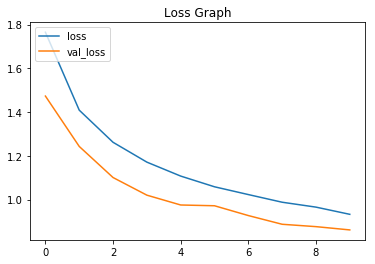

In [10]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [11]:
model.evaluate(x_test_shaped, y_test_cat)

10000/10000 [==============================] - 1s 102us/step


[0.8863370168685913, 0.6902]

In [12]:
model.save('cnn1.h5')